<a href="https://colab.research.google.com/github/fbaertl/Applied_Data_science_CAS_2022/blob/main/Module3/CAS_M3_Unsupervised_ML_QC_check_vs_CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
#% matplotlib inline

In [7]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [6]:
BATCH_SIZE = 128
nb_epochs = 40
VALIDATION_SPLIT = 0.2
num_classes = 10

In [8]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [9]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model


     

In [12]:
model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [13]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [14]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, validation_split = VALIDATION_SPLIT, verbose = 1)

Epoch 1/40
313/313 [==============================] - 14s 15ms/step - loss: 1.7898 - accuracy: 0.3509 - val_loss: 1.3896 - val_accuracy: 0.4916
Epoch 2/40
313/313 [==============================] - 4s 13ms/step - loss: 1.3607 - accuracy: 0.5167 - val_loss: 1.1973 - val_accuracy: 0.5757
Epoch 3/40
313/313 [==============================] - 4s 14ms/step - loss: 1.1494 - accuracy: 0.5907 - val_loss: 0.9757 - val_accuracy: 0.6561
Epoch 4/40
313/313 [==============================] - 4s 14ms/step - loss: 1.0219 - accuracy: 0.6385 - val_loss: 1.0301 - val_accuracy: 0.6408
Epoch 5/40
313/313 [==============================] - 5s 17ms/step - loss: 0.9258 - accuracy: 0.6765 - val_loss: 0.8976 - val_accuracy: 0.6833
Epoch 6/40
313/313 [==============================] - 4s 13ms/step - loss: 0.8534 - accuracy: 0.7008 - val_loss: 0.9127 - val_accuracy: 0.6889
Epoch 7/40
313/313 [==============================] - 4s 13ms/step - loss: 0.7952 - accuracy: 0.7208 - val_loss: 0.7822 - val_accuracy: 0.724

In [5]:
#from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
#datagen.fit(X_train)

NameError: ignored

In [ ]:
#Augmented data
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, validation_split = VALIDATION_SPLIT, verbose = 1)



Epoch 1/40
313/313 [==============================] - 4s 13ms/step - loss: 0.5384 - accuracy: 0.8296 - val_loss: 0.6701 - val_accuracy: 0.7845
Epoch 2/40
313/313 [==============================] - 4s 13ms/step - loss: 0.5432 - accuracy: 0.8250 - val_loss: 0.8232 - val_accuracy: 0.7882
Epoch 3/40
313/313 [==============================] - 4s 13ms/step - loss: 0.5432 - accuracy: 0.8283 - val_loss: 0.7756 - val_accuracy: 0.7713
Epoch 4/40
313/313 [==============================] - 4s 14ms/step - loss: 0.5493 - accuracy: 0.8238 - val_loss: 0.7690 - val_accuracy: 0.7805
Epoch 5/40
313/313 [==============================] - 4s 14ms/step - loss: 0.5582 - accuracy: 0.8221 - val_loss: 0.7924 - val_accuracy: 0.7861
Epoch 6/40
313/313 [==============================] - 4s 14ms/step - loss: 0.5600 - accuracy: 0.8260 - val_loss: 0.7462 - val_accuracy: 0.7690
Epoch 7/40
313/313 [==============================] - 4s 13ms/step - loss: 0.5590 - accuracy: 0.8238 - val_loss: 0.8424 - val_accuracy: 0.7826

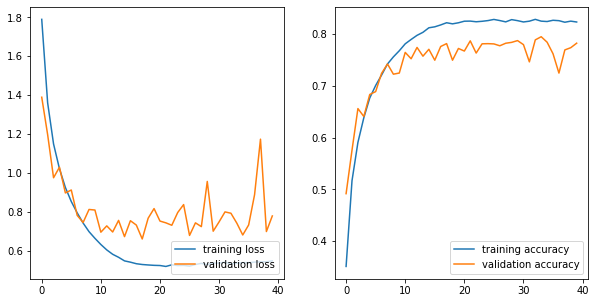

In [15]:
save_path = 'save/cifar10_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)


# 3. plot the loss and accuracy evolution during training
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(model_history.epoch, model_history.history['loss'])
axs[0].plot(model_history.epoch, model_history.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(model_history.epoch, model_history.history['accuracy'])
axs[1].plot(model_history.epoch, model_history.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()